In [1]:
# In[1]:


import astropy.units as u
import numpy as np
from astropy.coordinates import SkyCoord, Distance
#import popsims
import matplotlib.pyplot as plt
from popsims.plot_style import  plot_style
from astropy.coordinates import SkyCoord
import astropy.coordinates as astro_coord
import astropy.units as u
from tqdm import tqdm
from popsims.galaxy import Disk, Halo, GalacticComponent
from popsims import sample_from_powerlaw
import popsims
from gala.units import UnitSystem
import pandas as pd
from scipy.interpolate import interp1d, griddata, InterpolatedUnivariateSpline
from astropy.io.votable import parse_single_table
import numba
plot_style()
import warnings
warnings.filterwarnings("ignore")
import glob
from tqdm import tqdm
#get_ipython().run_line_magic('matplotlib', 'inline')


# In[2]:
from popsims.plot_style import plot_style
plot_style()


path_isochrone='../data/isochrones/'
path_data='../data/images/'
path_streamdata='../data/stream/'
path_pipeline='../data/pipeline/'
path_pandas= '../data/pandas/'

In [2]:
rgc='10_20'
fname=path_isochrone+'/simulated_df_at_M31_normalized_extended_rgc{}.csv'.format(rgc)
df=pd.read_csv(fname)

#put to the desired distance modulus 
mw_df= df.query("galaxy == 'MW'").reset_index(drop=True)
m31_df= df.query("galaxy =='M31'").reset_index(drop=True)

In [3]:
df

,Unnamed: 0,F062mag,F087mag,gmag,imag,logAge,MH,Mini,distance,appgmag,appgmag_er,appimag,appimag_er,appF062mag,appF062mag_er,appF087mag,appF087mag_er,g-i,galaxy
0,0,3.237951,2.933075,3.464264,3.391513,9.90,-2.00,0.869046,749196.613293,26.678609,0.500000,28.306967,0.500000,27.514700,0.1,27.406323,0.1,-1.628358,M31
1,1,NaN,NaN,NaN,NaN,10.10,-1.85,2.950886,676828.454153,NaN,NaN,NaN,NaN,NaN,0.1,NaN,0.1,NaN,M31
2,2,10.387791,9.272844,11.695552,9.979114,10.10,-1.70,0.171778,772545.102472,36.748673,0.500000,33.729025,0.500000,34.973839,0.1,33.927570,0.1,3.019648,M31
3,3,11.614407,10.250673,13.194285,11.021611,10.10,-1.55,0.123058,777329.511992,37.975577,0.500000,35.139785,0.500000,36.086056,0.1,34.598317,0.1,2.835792,M31
4,4,NaN,NaN,NaN,NaN,10.00,-1.70,1.374108,719368.183973,NaN,NaN,NaN,NaN,NaN,0.1,NaN,0.1,NaN,M31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23828180,23828180,NaN,NaN,NaN,NaN,10.10,-1.85,2.272893,14431.648135,NaN,NaN,NaN,NaN,NaN,0.1,NaN,0.1,NaN,MW
23828181,23828181,NaN,NaN,NaN,NaN,10.10,-1.55,0.942278,44194.124668,NaN,NaN,NaN,NaN,NaN,0.1,NaN,0.1,NaN,MW
23828182,23828182,7.354336,6.568672,8.176551,7.175254,10.05,-1.55,0.500796,62341.820155,27.323117,0.500000,25.352920,0.532259,26.229320,0.1,25.505310,0.1,1.970197,MW
23828183,23828183,12.196804,10.669067,13.915001,11.481126,10.10,-1.55,0.109528,46769.959808,32.050277,0.500000,29.721495,0.500000,30.588766,0.1,29.095075,0.1,2.328783,MW


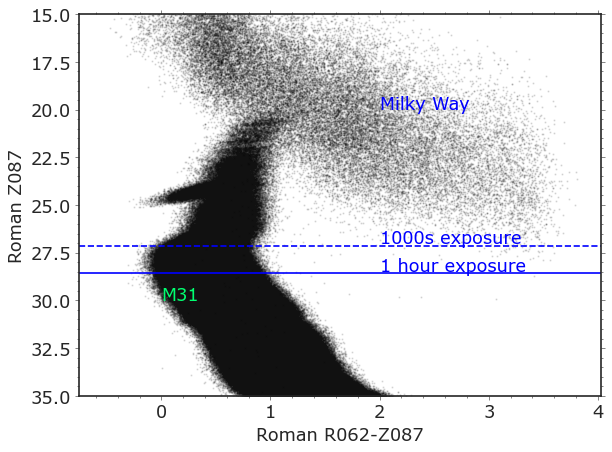

In [4]:
fig, ax=plt.subplots()

#ax.set(title='M31')
#ax.set(title='Milky Way')
p=ax.scatter(m31_df.appF062mag-m31_df.appF087mag, m31_df.appF087mag, s=1, alpha=0.1, c='#111111', label='M31 Halo')
ax.invert_yaxis()
ax.set(ylim=[35, 15])


ax.scatter(mw_df.appF062mag-mw_df.appF087mag, mw_df.appF087mag, s=1, alpha=0.1, c='k', label='Milky Way')
#ax.invert_yaxis()
#ax[1].set(ylim=[35, 15])

#for a in ax:
ax.axhline(28.59, linestyle='-', c='b')
ax.axhline(27.15, linestyle='--', c='b')
ax.set(xlabel= 'Roman R062-Z087', ylabel='Roman Z087')

#plt.tight_layout()
#cax = fig.add_axes([0.08, 0., .3, 0.04])
#plt.colorbar(p, ax=ax, cax=cax, orientation='horizontal')
#cax.set(xlabel=r'[M/H]')
#ax.legend(markerscale=20)
#ax.text()
ax.text(2., 20, "Milky Way",c='b', fontsize=16)
ax.text(0., 30, "M31",c='#01FF70', fontsize=16)

ax.text(2., 27.15-0.15, "1000s exposure",c='b', fontsize=16)
ax.text(2, 28.69-0.2, "1 hour exposure",c='b', fontsize=16)


ax.minorticks_on()
plt.tight_layout()
plt.savefig('../figures/simulated_CMD_Roman_M31.jpeg', bbox_inches='tight')

In [ ]:
#check luminosity functions 
fname=path_isochrone+'/simulated_df_at_M31_normalized_extended_rgc{}.csv'.format(rgc)
df=pd.read_csv(fname)

from astropy.io.votable import parse_single_table
path_pandas= '/users/caganze/research/stellarstreams/data/pandas/'
data=parse_single_table(path_pandas+'M31_{}kpc_new.vot'.format(rgc)).to_table().to_pandas()

In [ ]:
fig, ax=plt.subplots()
_= plt.hist(data.g, bins= np.arange(15, 27, 0.5), log=False, label='Data', color='#0074D9')
_= plt.hist(df.appgmag.values,
            bins= np.arange(15, 30, 0.5), log=False, histtype='step', linewidth=5, \
            label='Total Simulation', linestyle='-', color='k')
_= plt.hist(df.appgmag[df.galaxy.values == 'M31'].values,
            bins= np.arange(15, 30, 0.5), log=False, histtype='step',\
            linestyle='--', linewidth=5, label='M31 Halo', color='#FF851B')

_= plt.hist(df.appgmag[df.galaxy.values == 'MW'].values,
            bins= np.arange(15, 30, 0.5), log=False, histtype='step', linewidth=5, \
            label='MW Foregrounds', linestyle='--', color='#01FF70')


ax.set(xlabel='CFHT g mag', ylabel='Number of Stars', ylim=[0, 35_000], xlim=[17, 26.5])
ax.minorticks_on()
plt.legend()
plt.tight_layout()
plt.savefig('../figures/lf_check_rgc{}.jpeg'.format(rgc), bbox_inches='tight')

In [ ]:
'lf_check_rgc{}.pdf'.format(rgc)

In [ ]:
fig, ax=plt.subplots(ncols=2, figsize=(12, 6))
ax[0].scatter(data.g-data.i, data.g, c='k', s=1, marker=',', alpha=0.05)
df0= df[np.logical_and.reduce([df.appgmag.values <25.5, \
                       df.appgmag.values >18,\
                        df.appimag.values >18.,\
                       df.appimag.values < 25.5,
                       (df.galaxy.values == 'M31')]) ]

df1= df[np.logical_and.reduce([df.appgmag.values <25.5, \
                       df.appgmag.values >18,\
                        df.appimag.values >18.,\
                       df.appimag.values < 25.5,
                       (df.galaxy.values == 'MW')]) ]
ax[1].scatter(df0.appgmag-df0.appimag, df0.appgmag, s=.1, label='M31',  color='#0074D9')
ax[1].scatter(df1.appgmag-df1.appimag, df1.appgmag, s=.1, label='MW', color='#FF851B')

#ax[1].vlines()
for a in ax:
    a.invert_yaxis()
    a.set(xlabel='g-i', ylabel='g', xlim=[-2, 5])
    a.minorticks_on()
ax[-1].legend()
ax[-1].legend(markerscale=20)
ax[-1].minorticks_on()
ax[0].set(title='Data')
ax[1].set(title='Simulation')

plt.tight_layout()
plt.savefig('../figures/simulated_CMD_CFHT_rgc{}.jpeg'.format(rgc),  bbox_inches='tight')

In [ ]:
fig, ax=plt.subplots()
#ax.scatter(df.d, df.appgmag-df.gmag, s=.1)
#ax.scatter(mw_df.appF087mag, mw_df.appF087mag-mw_df.F087mag, s=.1)
#ax.scatter(m31_df.appF087mag, m31_df.appF087mag-m31_df.F087mag, s=.1)
ax.scatter(m31_df.appgmag, m31_df.appgmag-m31_df.gmag, s=.1)


#ax.set(ylim=[-10, 30], ylabel='m-M')

In [ ]:
fig, ax=plt.subplots()
#ax.scatter(df.d, df.appgmag-df.gmag, s=.1)
#ax.scatter(mw_df.distance, mw_df.appgmag-mw_df.gmag, s=.1)
ax.scatter((m31_df.distance-770_000)/1000, m31_df.appgmag-m31_df.gmag, s=.1, alpha=0.1)
ax.scatter((m31_df.distance-770_000)/1000, m31_df.appF087mag-m31_df.F087mag, s=.1)

#ax.scatter((m31_df.distance-770_000)/1000, m31_df.appgmag-m31_df.gmag, s=.1, alpha=0.1)

ax.set(xlabel='Distance (kpc) -770 kpc', ylabel='m-M')

In [ ]:
fig, ax=plt.subplots()

ax.scatter((mw_df.distance)/1000, mw_df.appgmag-mw_df.gmag, s=.1, alpha=1)
#ax.scatter((m31_df.distance-770_000)/1000, m31_df.appF087mag-m31_df.F087mag, s=.1)

ax.scatter((mw_df.distance)/1000, mw_df.appgmag-mw_df.gmag, s=.1, alpha=1)

ax.set(xlabel='Distance (kpc) -770 kpc', ylabel='m-M')

In [ ]:
fig, ax=plt.subplots()

ax.scatter( mw_df.appimag, mw_df.appimag_er, s=.1, alpha=1)
#ax.scatter( m31_df.appgmag, m31_df.appgmag_er, s=.1, alpha=1)

ax.set(xlabel='gmag', ylabel='gmag error')

In [ ]:
df.columns

In [ ]:
data --> presumbaly we're su

In [ ]:
fig, ax=plt.subplots()
for i in range(0, 10000):
    x=np.random.normal([2, 2], [10, 0.1])
    ax.axvline(x[0]/10+x[1], c='k', alpha=0.1)
    

In [ ]:
x.flatten().sum()